# <center>BMI 598: Project</center>

In [0]:
# For compatibility with Python 2
from __future__ import print_function
from past.builtins import xrange

from math import sqrt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# To support plots
import matplotlib.pyplot as plt


import seaborn as sns

sns.set(color_codes=True)

# To display all the plots inline
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
my_drive = '/content/drive/My Drive/'

## <center>1. Load the data</center>

In [0]:
# To increase quality of figures
plt.rcParams["figure.figsize"] = (10, 5)

In [0]:
def get_data(file):
  data = pd.read_csv(file, sep='\t', header=None, names=["Sentence #1", "Sentence #2", "Similarity"])
  X = data.values[:, :2]
  y = data['Similarity'].values
  return (X, y)

X_train, y_train = get_data(my_drive+'clinicalSTS2019.train.txt')

data_train = pd.read_csv(my_drive+'clinicalSTS2019.train.txt', sep='\t', header=None, names=["Sentence #1", "Sentence #2", "Similarity"])

In [6]:
print(X_train)

[[' Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.'
  ' Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.']
 ['oxycodone [ROXICODONE] 5 mg tablet 0.5-1 tablets by mouth every 4 hours as needed.'
  'pantoprazole [PROTONIX] 40 mg tablet enteric coated 1 tablet by mouth Bid before meals.']
 ['The patient has missed 0 hours of work in the past seven days for issues not related to depression.'
  ' In the past year the patient has the following number of visits: none in the hospital  none in the er and  one as an outpatient.']
 ...
 ['Explained diagnosis and treatment plan; patient/child/care giver expressed understanding of the content.'
  ' Explained diagnosis and treatment plan; patient/child/caregiver expressed unde

In [7]:
data_train

,Sentence #1,Sentence #2,Similarity
0,"Patient arrives, via hospital wheelchair, Gai...","Complex assessment performed, Patient arrives...",3.00
1,oxycodone [ROXICODONE] 5 mg tablet 0.5-1 table...,pantoprazole [PROTONIX] 40 mg tablet enteric c...,1.00
2,The patient has missed 0 hours of work in the ...,In the past year the patient has the followin...,0.00
3,"Given current medication regimen, the followi...","Given current medication regimen, the followi...",3.00
4,The diagnosis and treatment plan were explaine...,Explained diagnosis and treatment plan; patie...,4.00
...,...,...,...
1649,"New wheezing or chest tightness, runny or blo...",F (38 C) or suspected fever; new wheezing or ...,3.00
1650,You should not take any medications that cause...,You should not take any medications that caus...,5.00
1651,Explained diagnosis and treatment plan; patien...,Explained diagnosis and treatment plan; patie...,4.25
1652,The patient remained focused on group tasks an...,The patient's medication(s) were reconciled c...,0.00


In [0]:
X_train_original = X_train

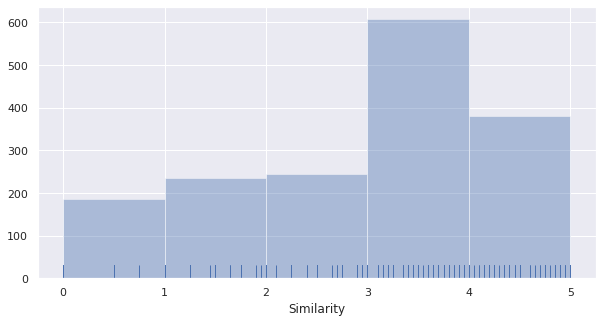

In [9]:
sns.distplot(data_train['Similarity'], bins=5, kde=False, rug=True)

In [0]:
y_true = y_train

In [11]:
#load the training set
!cp '/content/drive/My Drive/test.zip' test.zip
!unzip test.zip

Archive:  test.zip
  inflating: clinicalSTS2019.test.gs.sim.txt  
  inflating: clinicalSTS2019.test.txt  


In [12]:
X_test_original = pd.read_csv('clinicalSTS2019.test.txt', sep='\t', header=None, names=["Sentence #1", "Sentence #2"])
X_test_original = X_test_original.values
print(X_train_original)

[[' Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.'
  ' Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.']
 ['oxycodone [ROXICODONE] 5 mg tablet 0.5-1 tablets by mouth every 4 hours as needed.'
  'pantoprazole [PROTONIX] 40 mg tablet enteric coated 1 tablet by mouth Bid before meals.']
 ['The patient has missed 0 hours of work in the past seven days for issues not related to depression.'
  ' In the past year the patient has the following number of visits: none in the hospital  none in the er and  one as an outpatient.']
 ...
 ['Explained diagnosis and treatment plan; patient/child/care giver expressed understanding of the content.'
  ' Explained diagnosis and treatment plan; patient/child/caregiver expressed unde

In [13]:
y_test_original = pd.read_csv('clinicalSTS2019.test.gs.sim.txt', sep='\t', header=None, names=["Similarity"])
y_test_original = y_test_original.values
y_test_original = y_test_original.flatten()
print((y_test_original))

[0.5 1.  5.  1.  0.  1.  1.  0.5 1.  1.  2.5 1.  1.  0.  4.  3.5 4.  1.
 4.5 1.5 0.5 0.  1.  0.  1.  0.  0.5 2.  1.5 0.  0.  5.  1.  0.5 1.5 1.
 0.5 3.  4.  4.  4.  1.  1.5 1.  1.5 1.  3.5 1.  1.  1.  1.  1.  1.  0.5
 0.  3.  4.  1.  4.  2.5 1.  0.  0.5 3.5 4.  4.  1.  1.  1.5 0.  1.  0.
 0.5 1.  3.  1.  4.5 5.  1.  1.  0.  1.  4.  1.  0.  0.5 1.5 0.  1.  1.
 2.  4.  0.  0.  2.5 1.  2.5 4.  2.  3.  4.  3.  0.5 2.5 1.  1.  0.  2.
 0.5 1.  5.  1.  0.  4.  3.5 0.  1.  1.  1.  1.5 4.  3.  1.5 0.  1.  0.
 1.5 4.5 0.  5.  4.5 0.  1.  2.  4.  0.5 0.5 2.5 0.5 1.  1.  4.5 5.  0.
 4.  0.  1.  2.  1.  0.  1.  0.  0.  4.5 1.  4.5 1.  1.5 0.5 1.  4.  1.
 1.  0.  0.  2.  1.  1.  0.  0.  1.  1.  1.  2.  5.  0.  0.  4.5 5.  4.
 1.  0.  4.5 0.  1.  4.5 3.  4.  1.  1.  1.  0.  1.  2.  1.  4.  1.  1.5
 0.5 0.  1.  0.  1.  1.  4.5 1.5 4.  1.  5.  2.  4.  1.  1.  1.  0.  1.5
 0.  3.  1.  0.  3.5 1.  1.  1.5 1.  1.5 0.5 0.  0.  1.  1.  1.  0.5 4.
 1.  4.  1.  4.  0.  4.  1.5 3.5 0.5 1.  1.  4.5 2.  1.  0.5 

In [0]:
X_train60, y_train60 = get_data("/content/drive/My Drive/clinicalSTS2019.train_train60.csv")
X_test20, y_test20 = get_data("/content/drive/My Drive/clinicalSTS2019.train_test20.csv")

## 2.Regression

In [0]:
def accuracy(y_true, y_hat):
  return pearsonr(y_true, y_hat)[0]

In [0]:
# REGRESSION
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def train_data_split(X_train, y_train):
  return train_test_split(X_train, y_train, test_size=0.2, random_state=598)

def predict_train(X_train, y_train, reg):
  _X_train, _X_test, _y_train, _y_test = train_data_split(X_train, y_train)
  reg.fit(_X_train, _y_train)
  y_hat = reg.predict(_X_test)
  return y_hat, _y_test

def get_optimal_rf_model(X, y):
  params = {
      'learning_rate': 0.01, 
      'random_state': 598, 
      'max_features': 'sqrt'
  }
  model = GridSearchCV(GradientBoostingRegressor(**params),
                            cv=5,
                            n_jobs=-1,
                            iid=False,
                            param_grid={
                                'n_estimators':[200, 300, 400, 500],
                                'max_depth': [4, 5, 6, 7],
                                'min_samples_split': [2, 4, 6, 8],
                                'subsample': [0.6, 0.7, 0.8]
                            })
  model.fit(X, y)
  print('Optimal parameters:', model.best_params_)
  ml_alg = GradientBoostingRegressor(**params, **model.best_params_)
  return ml_alg

def plot_accuracy(y, y_hat):
  print('Accuracy:', accuracy(y, y_hat))
  plt.plot(y, y_hat, 'ro')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Predicted vs Actual')
  plt.show()

## <center>3. BERT based Feature extraction</center>

In [17]:
!pip install transformers

     |████████████████████████████████| 368kB 4.8MB/s 
     |████████████████████████████████| 1.0MB 42.9MB/s 
     |████████████████████████████████| 675kB 45.5MB/s 
     |████████████████████████████████| 860kB 38.6MB/s 
  Created wheel for regex: filename=regex-2019.12.9-cp36-cp36m-linux_x86_64.whl size=609187 sha256=1cd116df787ba58ef70bb3a7bd0d154679570cfc3d7ae0d57f4e6ec6c0cc815e
  Stored in directory: /root/.cache/pip/wheels/0d/fb/b3/a89169557229468c49ca64f6839418f22461f6ee0a74f342b1
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=807198a340dacc91972783c98c67dfc4462ec6a637310785a3e429df903c6eea
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built regex sacremoses


In [18]:
import torch
from transformers import *
model_class = BertModel
tokenizer_class = BertTokenizer.from_pretrained('bert-base-uncased')
pretrained_weights = 'bert-base-uncased'

100%|██████████| 231508/231508 [00:00<00:00, 1182861.96B/s]


In [19]:
#######################from huggingface documentation 

vanilla_bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
vanilla_bert_model = BertModel.from_pretrained('bert-base-uncased')



100%|██████████| 440473133/440473133 [00:12<00:00, 36056373.82B/s]


In [20]:
input_ids = torch.tensor(vanilla_bert_tokenizer.encode("Hello my dog is cute", add_special_tokens= True)).unsqueeze(0)  # Batch size 1
print(input_ids)
outputs = vanilla_bert_model(input_ids)
last_hidden_states = outputs[0][0].detach().numpy()  # The last hidden-state is the first element of the output tuple

print(last_hidden_states)
print(len(last_hidden_states))
print(last_hidden_states.shape)
print(outputs[0])

tensor([[  101,  7592,  2026,  3899,  2003, 10140,   102]])
[[ 0.02520709  0.20342118  0.17750171 ... -0.43001023  0.07378592
   0.563757  ]
 [ 0.03636122  0.56766444  0.9678673  ... -0.2936435  -0.19087738
   0.02368227]
 [-0.02869914  0.29985967  0.6602603  ... -0.5045791  -0.05440554
   0.21559508]
 ...
 [-0.658215   -0.2710841   0.2554944  ... -0.4243345  -0.21272337
   0.94851536]
 [-0.7283804  -0.5868736  -0.13885021 ...  0.32102168  0.27705067
   0.06500375]
 [ 0.53293115  0.08652045 -0.3042307  ...  0.03785072 -0.52515227
  -0.20991923]]
7
(7, 768)
tensor([[[ 0.0252,  0.2034,  0.1775,  ..., -0.4300,  0.0738,  0.5638],
         [ 0.0364,  0.5677,  0.9679,  ..., -0.2936, -0.1909,  0.0237],
         [-0.0287,  0.2999,  0.6603,  ..., -0.5046, -0.0544,  0.2156],
         ...,
         [-0.6582, -0.2711,  0.2555,  ..., -0.4243, -0.2127,  0.9485],
         [-0.7284, -0.5869, -0.1389,  ...,  0.3210,  0.2771,  0.0650],
         [ 0.5329,  0.0865, -0.3042,  ...,  0.0379, -0.5252, -0.2099

### one sentence at a time

In [0]:
from sklearn.metrics import pairwise

In [0]:
def bert_based_features_original(data, local_bert_model, local_tokenizer):
  feat = np.zeros((len(data), 20))
  cls_vectors = np.zeros((len(data), 768*2))

  for i in range(len(data)):

    sen_1 = data[i][0]
    sen_1_input_ids = torch.tensor([local_tokenizer.encode(sen_1, add_special_tokens=True)])
    sen_1_vectors = local_bert_model(sen_1_input_ids)[0][0].detach().numpy()
    sen_1_cls_vector = sen_1_vectors[0]
    sen_1_cls_vector_reshaped = sen_1_cls_vector.reshape(1, -1)

    sen_1_avg_vector = np.average(sen_1_vectors[1:-1], axis=0)
    sen_1_max_vector = np.amax(sen_1_vectors[1:-1], axis=0)
    sen_1_min_vector = np.amin(sen_1_vectors[1:-1], axis=0)
    sen_1_avg_vector_reshaped = sen_1_avg_vector.reshape(1, -1)
    sen_1_max_vector_reshaped = sen_1_max_vector.reshape(1, -1)
    sen_1_min_vector_reshaped = sen_1_min_vector.reshape(1, -1)



    sen_2 = data[i][1]
    sen_2_input_ids = torch.tensor([local_tokenizer.encode(sen_2, add_special_tokens=True)])
    sen_2_vectors = local_bert_model(sen_2_input_ids)[0][0].detach().numpy()
    sen_2_cls_vector = sen_2_vectors[0]
    sen_2_cls_vector_reshaped = sen_2_cls_vector.reshape(1, -1)

    sen_2_avg_vector = np.average(sen_2_vectors[1:-1], axis=0)
    sen_2_max_vector = np.amax(sen_2_vectors[1:-1], axis=0)
    sen_2_min_vector = np.amin(sen_2_vectors[1:-1], axis=0)
    sen_2_avg_vector_reshaped = sen_2_avg_vector.reshape(1, -1)
    sen_2_max_vector_reshaped = sen_2_max_vector.reshape(1, -1)
    sen_2_min_vector_reshaped = sen_2_min_vector.reshape(1, -1)



    cls_vectors[i] = np.concatenate((sen_1_cls_vector, sen_2_cls_vector))
    if i == 0:
      print(len(sen_1_cls_vector))
      print(len(sen_1_avg_vector))
      print(len(sen_1_max_vector))
      print(len(sen_1_min_vector))
      print(len(sen_1_vectors[1:-1]))
      print(len(sen_1))
      print(sen_1)
    if i % 50 == 0:
      print("i=",i)


    #calculate the features for max vectors
    feat[i, 0] = pairwise.cosine_similarity(sen_1_max_vector_reshaped, sen_2_max_vector_reshaped)[0][0]
    euclidean_dist = pairwise.euclidean_distances(sen_1_max_vector_reshaped, sen_2_max_vector_reshaped)[0][0]
    feat[i, 1] = euclidean_dist #(1/(0.0000000001+euclidean_dist))
    sq_euclidean_dist = euclidean_dist**2
    feat[i, 2] = sq_euclidean_dist #(1/(0.0000000001+sq_euclidean_dist))
    manhattan_dist = pairwise.manhattan_distances(sen_1_max_vector_reshaped, sen_2_max_vector_reshaped)[0][0]
    feat[i, 3] = manhattan_dist #(1/(0.0000000001+manhattan_dist))
    pearson_corr, p_val = pearsonr(sen_1_max_vector, sen_2_max_vector)
    feat[i, 4] = pearson_corr


        #calculate the features for min vectors
    feat[i, 5] = pairwise.cosine_similarity(sen_1_min_vector_reshaped, sen_2_min_vector_reshaped)[0][0]
    euclidean_dist = pairwise.euclidean_distances(sen_1_min_vector_reshaped, sen_2_min_vector_reshaped)[0][0]
    feat[i, 6] = euclidean_dist #(1/(0.0000000001+euclidean_dist))
    sq_euclidean_dist = euclidean_dist**2
    feat[i, 7] = sq_euclidean_dist #(1/(0.0000000001+sq_euclidean_dist))
    manhattan_dist = pairwise.manhattan_distances(sen_1_min_vector_reshaped, sen_2_min_vector_reshaped)[0][0]
    feat[i, 8] = manhattan_dist #(1/(0.0000000001+manhattan_dist))
    pearson_corr, p_val = pearsonr(sen_1_min_vector, sen_2_min_vector)
    feat[i, 9] = pearson_corr


        #calculate the features for avg vectors
    feat[i, 10] = pairwise.cosine_similarity(sen_1_avg_vector_reshaped, sen_2_avg_vector_reshaped)[0][0]
    euclidean_dist = pairwise.euclidean_distances(sen_1_avg_vector_reshaped, sen_2_avg_vector_reshaped)[0][0]
    feat[i, 11] = euclidean_dist #(1/(0.0000000001+euclidean_dist))
    sq_euclidean_dist = euclidean_dist**2
    feat[i, 12] = sq_euclidean_dist #(1/(0.0000000001+sq_euclidean_dist))
    manhattan_dist = pairwise.manhattan_distances(sen_1_avg_vector_reshaped, sen_2_avg_vector_reshaped)[0][0]
    feat[i, 13] = manhattan_dist #(1/(0.0000000001+manhattan_dist))
    pearson_corr, p_val = pearsonr(sen_1_avg_vector, sen_2_avg_vector)
    feat[i, 14] = pearson_corr

        #calculate the features for cls vectors
    feat[i, 15] = pairwise.cosine_similarity(sen_1_cls_vector_reshaped, sen_2_cls_vector_reshaped)[0][0]
    euclidean_dist = pairwise.euclidean_distances(sen_1_cls_vector_reshaped, sen_2_cls_vector_reshaped)[0][0]
    feat[i, 16] = euclidean_dist #(1/(0.0000000001+euclidean_dist))
    sq_euclidean_dist = euclidean_dist**2
    feat[i, 17] = sq_euclidean_dist #(1/(0.0000000001+sq_euclidean_dist))
    manhattan_dist = pairwise.manhattan_distances(sen_1_cls_vector_reshaped, sen_2_cls_vector_reshaped)[0][0]
    feat[i, 18] = manhattan_dist #(1/(0.0000000001+manhattan_dist))
    pearson_corr, p_val = pearsonr(sen_1_cls_vector, sen_2_cls_vector)
    feat[i, 19] = pearson_corr

  return feat, cls_vectors

#### Vanilla bert

In [24]:
#VANILLA BERT FEATURES
features_bert_og, features_bert_cls_og = bert_based_features_original(X_train_original, vanilla_bert_model, vanilla_bert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 200, 'subsample': 0.6}
Accuracy: 0.6952928797176983


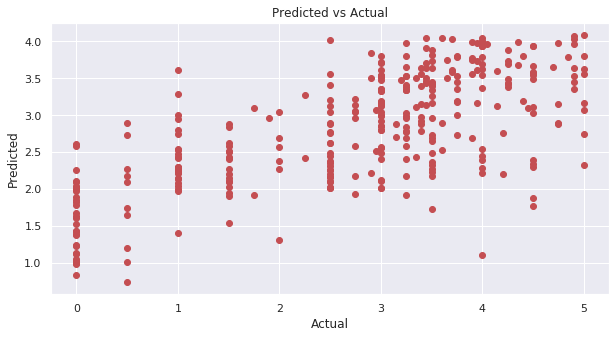

In [32]:
y_train_test_hat, y_train_test = predict_train(features_bert_og, y_true, get_optimal_rf_model(features_bert_og[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

In [0]:
y_train_test_hat, y_train_test = predict_train(features_bert_cls_og, y_true, get_optimal_rf_model(features_bert_cls_og[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### fine tunedBERT on *dataset*

In [0]:
!cp '/content/drive/My Drive/bert_finetuned_sts_biomedical.zip' ./bert_finetuned_sts_biomedical.zip

In [34]:
!unzip bert_finetuned_sts_biomedical.zip 

Archive:  bert_finetuned_sts_biomedical.zip
   creating: output/
   creating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/
 extracting: output/training_n2c2_sts_bert-2019-11-28_11-43-46/config.json  
   creating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/1_Pooling/
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/1_Pooling/config.json  
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/similarity_evaluation_results.csv  
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/modules.json  
   creating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT/
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT/config.json  
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT/vocab.txt  
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT/pytorch_model.bin  
  inflating: output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT/special_tokens_map.json  
 extracting: output/training_n2c2

In [0]:
pretrained_weights = 'output/training_n2c2_sts_bert-2019-11-28_11-43-46/0_BERT'

# Load pretrained model/tokenizer
sts_biomedical_bert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
sts_biomedical_bert_model = model_class.from_pretrained(pretrained_weights)

In [0]:
features_bert_sts_biomedical_train60, features_bert_cls_sts_biomedical_train60 = bert_based_features_original(X_train60, sts_biomedical_bert_model, sts_biomedical_bert_tokenizer)

In [0]:
features_bert_sts_biomedical_test20, features_bert_cls_sts_biomedical_test20 = bert_based_features_original(X_test20, sts_biomedical_bert_model, sts_biomedical_bert_tokenizer)

In [46]:
features_bert_sts_biomedical, features_bert_cls_sts_biomedical = bert_based_features_original(X_train_original, sts_biomedical_bert_model, sts_biomedical_bert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 0.8878744404205204


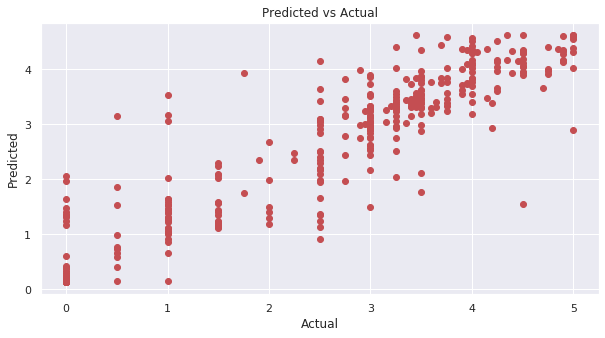

In [47]:
y_train_test_hat, y_train_test = predict_train(features_bert_sts_biomedical, y_true, get_optimal_rf_model(features_bert_sts_biomedical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

##### test on actual test data

In [0]:
features_bert_sts_biomedical_test, features_bert_cls_sts_biomedical_test = bert_based_features_original(X_test_original, sts_biomedical_bert_model, sts_biomedical_bert_tokenizer)

In [0]:
y_hat = np.zeros(y_test_original.shape[0])

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=2)
gb_model.fit(features_bert_sts_biomedical, y_true)
y_hat =gb_model.predict(features_bert_sts_biomedical_test)

print('Accuracy:')
print(accuracy(y_test_original, y_hat))
plt.plot(y_test_original, y_hat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### fine tuned **roberta**

In [0]:
!cp '/content/drive/My Drive/roberta_finetuned_sts_biomedical.zip' ./roberta_finetuned_sts_biomedical.zip

In [38]:
!unzip roberta_finetuned_sts_biomedical.zip 

Archive:  roberta_finetuned_sts_biomedical.zip
   creating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/
   creating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/
 extracting: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/added_tokens.json  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/merges.txt  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/pytorch_model.bin  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/sentence_roberta_config.json  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/vocab.json  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/config.json  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa/special_tokens_map.json  
  inflating: output/training_n2c2_sts_roberta-2019-12-03_08-16-46/similarity_evaluation_results.csv  
 extracting: output/training_n2c2_sts_

In [0]:
roberta_model_class = RobertaModel
roberta_tokenizer_class = RobertaTokenizer
pretrained_weights = 'output/training_n2c2_sts_roberta-2019-12-03_08-16-46/0_RoBERTa'
# Load pretrained model/tokenizer
sts_biomedical_roberta_tokenizer = roberta_tokenizer_class.from_pretrained(pretrained_weights)
sts_biomedical_roberta_model = roberta_model_class.from_pretrained(pretrained_weights)

In [48]:
features_roberta_sts_biomedical, features_roberta_cls_sts_biomedical = bert_based_features_original(X_train_original, sts_biomedical_roberta_model, sts_biomedical_roberta_tokenizer)

768
768
768
768
35
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


In [0]:
features_roberta_sts_biomedical_test, features_roberta_cls_sts_biomedical_test = bert_based_features_original(X_test_original, sts_biomedical_roberta_model, sts_biomedical_roberta_tokenizer)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 0.8886079232922197


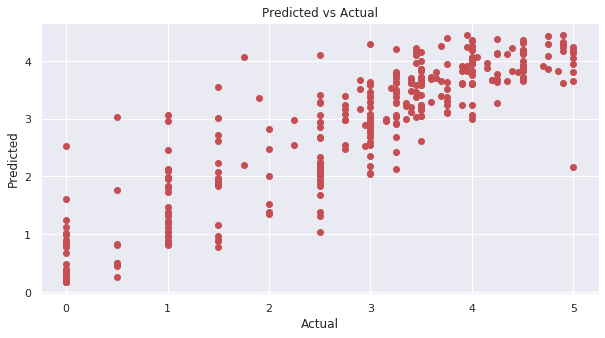

In [49]:
y_train_test_hat, y_train_test = predict_train(features_roberta_sts_biomedical, y_true, get_optimal_rf_model(features_roberta_sts_biomedical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### fine tuned bio bert

In [0]:
!cp '/content/drive/My Drive/biobert_finetuned_sts_biomedical_mean_only.zip' ./biobert_finetuned_sts_biomedical_mean_only.zip

In [42]:
!unzip biobert_finetuned_sts_biomedical_mean_only.zip 

Archive:  biobert_finetuned_sts_biomedical_mean_only.zip
   creating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/
 extracting: output/training_n2c2_sts_bert-2019-11-29_05-53-55/config.json  
   creating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/1_Pooling/
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/1_Pooling/config.json  
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/similarity_evaluation_results.csv  
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/modules.json  
   creating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT/
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT/config.json  
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT/vocab.txt  
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT/pytorch_model.bin  
  inflating: output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT/special_tokens_map.json  
 extracting: output/training_n2c2_sts_ber

In [0]:
pretrained_weights = 'output/training_n2c2_sts_bert-2019-11-29_05-53-55/0_BERT'

# Load pretrained model/tokenizer
sts_biomedical_biobert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
sts_biomedical_biobert_model = model_class.from_pretrained(pretrained_weights)

In [50]:
features_biobert_sts_biomedical, features_biobert_cls_sts_biomedical = bert_based_features_original(X_train_original, sts_biomedical_biobert_model, sts_biomedical_biobert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.9202214653121965


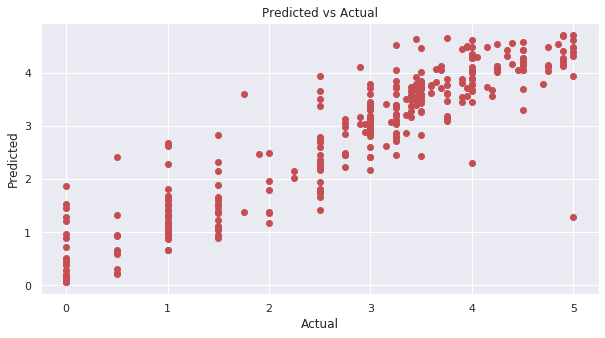

In [51]:
y_train_test_hat, y_train_test = predict_train(features_biobert_sts_biomedical, y_true, get_optimal_rf_model(features_biobert_sts_biomedical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

In [0]:
y_train_test_hat, y_train_test = predict_train(features_biobert_cls_sts_biomedical, y_true, get_optimal_rf_model(features_biobert_cls_sts_biomedical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### BIO BERT

In [52]:
!gdown https://drive.google.com/uc?id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD

Downloading...
From: https://drive.google.com/uc?id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD
To: /content/biobert_v1.1_pubmed.tar.gz
401MB [00:05, 78.1MB/s]


In [53]:
!tar xvzf biobert_v1.1_pubmed.tar.gz

biobert_v1.1_pubmed/
biobert_v1.1_pubmed/model.ckpt-1000000.data-00000-of-00001
biobert_v1.1_pubmed/model.ckpt-1000000.meta
biobert_v1.1_pubmed/bert_config.json
biobert_v1.1_pubmed/vocab.txt
biobert_v1.1_pubmed/model.ckpt-1000000.index


In [54]:
!transformers bert biobert_v1.1_pubmed/model.ckpt-1000000 biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/pytorch_model.bin

Building PyTorch model from configuration: {
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pruned_heads": {},
  "torchscript": false,
  "type_vocab_size": 2,
  "use_bfloat16": false,
  "vocab_size": 28996
}

INFO:transformers.modeling_bert:Converting TensorFlow checkpoint from /content/biobert_v1.1_pubmed/model.ckpt-1000000
INFO:transformers.modeling_bert:Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/embeddings/position_

In [0]:
#after this, renamed bert_config.json to config.json manually
!cp biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/config.json

In [0]:
model_class = BertModel
tokenizer_class = BertTokenizer.from_pretrained('biobert_v1.1_pubmed/vocab.txt')
pretrained_weights = 'biobert_v1.1_pubmed'

# Load pretrained model/tokenizer
bio_bert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bio_bert_model = model_class.from_pretrained(pretrained_weights)

In [57]:
input_ids = torch.tensor(bio_bert_tokenizer.encode("Hello my dog is cute", add_special_tokens= True)).unsqueeze(0)  # Batch size 1
print(input_ids)
outputs = bio_bert_model(input_ids)
last_hidden_states = outputs[0][0].detach().numpy()  # The last hidden-state is the first element of the output tuple
print(len(outputs))
print(last_hidden_states)
print(len(last_hidden_states))
print(last_hidden_states.shape)
print(outputs[0])
print(outputs[1])

tensor([[  101, 19082,  1139,  3676,  1110, 10509,   102]])
2
[[ 0.30595413  0.6154358  -0.2122898  ... -0.23292513  0.73406136
  -0.30510715]
 [-0.02054498  0.35774222 -0.37772265 ... -0.3032497   0.8740787
  -0.3120333 ]
 [ 0.00812341 -0.03995946 -0.16461788 ... -0.03652666  0.7840643
  -0.00675428]
 ...
 [ 0.11687239  0.40033427 -0.29609394 ...  0.0957466   0.39718673
   0.04781871]
 [-0.00829414  0.16456313 -0.12430103 ... -0.01243092  0.6628006
   0.03179159]
 [ 0.37802875  0.6493508  -0.95986825 ... -0.16714506  1.3767036
  -0.9745663 ]]
7
(7, 768)
tensor([[[ 0.3060,  0.6154, -0.2123,  ..., -0.2329,  0.7341, -0.3051],
         [-0.0205,  0.3577, -0.3777,  ..., -0.3032,  0.8741, -0.3120],
         [ 0.0081, -0.0400, -0.1646,  ..., -0.0365,  0.7841, -0.0068],
         ...,
         [ 0.1169,  0.4003, -0.2961,  ...,  0.0957,  0.3972,  0.0478],
         [-0.0083,  0.1646, -0.1243,  ..., -0.0124,  0.6628,  0.0318],
         [ 0.3780,  0.6494, -0.9599,  ..., -0.1671,  1.3767, -0.9746]]

In [58]:
#BIO BERT FEATURES
features_bert_bio, features_bert_cls_bio = bert_based_features_original(X_train_original, bio_bert_model, bio_bert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.77020093762843


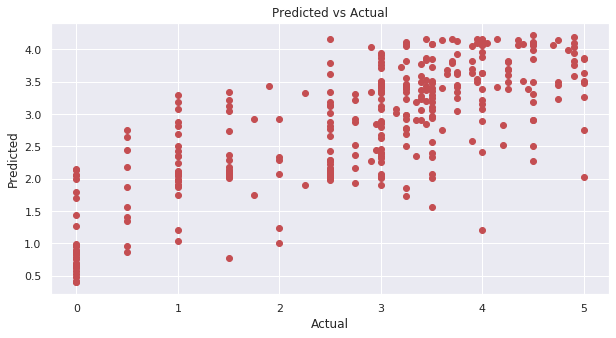

In [59]:
y_train_test_hat, y_train_test = predict_train(features_bert_bio, y_true, get_optimal_rf_model(features_bert_bio[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

In [0]:
y_train_test_hat, y_train_test = predict_train(features_bert_cls_bio, y_true, get_optimal_rf_model(features_bert_cls_bio[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### STS-b model

In [60]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/bert-base-nli-stsb-mean-tokens.zip

--2019-12-13 01:13:36--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/bert-base-nli-stsb-mean-tokens.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405233603 (386M) [application/zip]
Saving to: ‘bert-base-nli-stsb-mean-tokens.zip’

bert-base-nli-stsb- 100%[===================>] 386.46M  20.4MB/s    in 22s     

2019-12-13 01:13:59 (17.4 MB/s) - ‘bert-base-nli-stsb-mean-tokens.zip’ saved [405233603/405233603]



In [61]:
!unzip bert-base-nli-stsb-mean-tokens.zip

Archive:  bert-base-nli-stsb-mean-tokens.zip
   creating: 0_BERT/
 extracting: 0_BERT/added_tokens.json  
  inflating: 0_BERT/config.json      
  inflating: 0_BERT/pytorch_model.bin  
 extracting: 0_BERT/sentence_bert_config.json  
  inflating: 0_BERT/special_tokens_map.json  
  inflating: 0_BERT/vocab.txt        
   creating: 1_Pooling/
  inflating: 1_Pooling/config.json   
  inflating: modules.json            


In [0]:
pretrained_weights = '0_BERT'

# Load pretrained model/tokenizer
stsb_bert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
stsb_bert_model = model_class.from_pretrained(pretrained_weights)

In [63]:
#STSB BERT FEATURES
features_bert_stsb, features_bert_cls_stsb = bert_based_features_original(X_train_original, stsb_bert_model, stsb_bert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
Accuracy: 0.7600821885151754


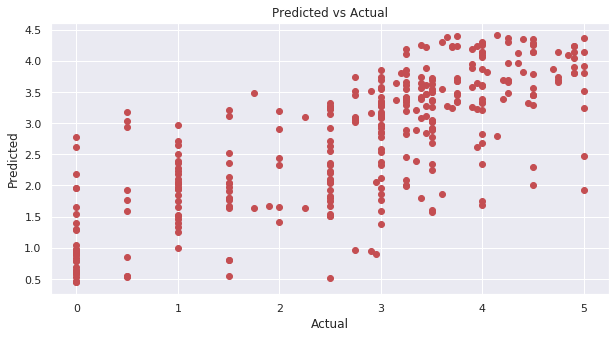

In [64]:
y_train_test_hat, y_train_test = predict_train(features_bert_stsb, y_true, get_optimal_rf_model(features_bert_stsb[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### STSB + BIOBERT + VANILLA

In [0]:
features_stsb_bio_og = np.concatenate([features_bert_og, features_bert_bio, features_bert_stsb], axis=1)

y_train_test_hat, y_train_test = predict_train(features_stsb_bio_og, y_true, get_optimal_rf_model(features_stsb_bio_og[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### BIO CLINICAL BERT

In [65]:
#CLINICAL BERT

!wget -O pretrained_bert_tf.tar.gz https://www.dropbox.com/s/8armk04fu16algz/pretrained_bert_tf.tar.gz?dl=1

--2019-12-13 01:21:04--  https://www.dropbox.com/s/8armk04fu16algz/pretrained_bert_tf.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8armk04fu16algz/pretrained_bert_tf.tar.gz [following]
--2019-12-13 01:21:04--  https://www.dropbox.com/s/dl/8armk04fu16algz/pretrained_bert_tf.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7f9f140366d6569332d30152b4.dl.dropboxusercontent.com/cd/0/get/AuLgZ1lmEJIxfMIjzlz97sqK_LUWxMmtN_1u6U_yGydqd9jjnkFJ8o8H-KVkp4MnFPPlypPEhod2aUtFAgC22SSdDEGdQpXSQhtOdkWxtJul6DXEC8XNis-Vjv5qjSkK0zs/file?dl=1# [following]
--2019-12-13 01:21:04--  https://uc7f9f140366d6569332d30152b4.dl.dropboxusercontent.com/cd/0/get/AuLgZ1lmEJIxfMIjzlz97sqK_LUWxMmtN_1u6U_yGydqd9jjnkFJ8o8H-KVkp4MnFPPlypPEh

In [66]:
!tar xvzf pretrained_bert_tf.tar.gz

pretrained_bert_tf/
pretrained_bert_tf/biobert_pretrain_output_all_notes_150000.tar.gz
pretrained_bert_tf/bert_pretrain_output_all_notes_150000.tar.gz
pretrained_bert_tf/bert_pretrain_output_disch_100000.tar.gz
pretrained_bert_tf/biobert_pretrain_output_disch_100000.tar.gz


In [67]:
!tar xvzf pretrained_bert_tf/biobert_pretrain_output_all_notes_150000.tar.gz

biobert_pretrain_output_all_notes_150000/
biobert_pretrain_output_all_notes_150000/model.ckpt-150000.index
biobert_pretrain_output_all_notes_150000/model.ckpt-150000.meta
biobert_pretrain_output_all_notes_150000/graph.pbtxt
biobert_pretrain_output_all_notes_150000/bert_config.json
biobert_pretrain_output_all_notes_150000/vocab.txt
biobert_pretrain_output_all_notes_150000/pytorch_model.bin
biobert_pretrain_output_all_notes_150000/model.ckpt-150000.data-00000-of-00001


In [0]:
#!transformers bert biobert_pretrain_output_all_notes_150000/model.ckpt-1000000 biobert_pretrain_output_all_notes_150000/bert_config.json biobert_pretrain_output_all_notes_150000/pytorch_model.bin

In [0]:
#after this, renamed bert_config.json to config.json manually
!cp biobert_pretrain_output_all_notes_150000/bert_config.json biobert_pretrain_output_all_notes_150000/config.json

In [0]:
model_class = BertModel
tokenizer_class = BertTokenizer
pretrained_weights = 'biobert_pretrain_output_all_notes_150000'

# Load pretrained model/tokenizer
bio_clinical_bert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bio_clinical_bert_model = model_class.from_pretrained(pretrained_weights)

In [0]:
#BIO CLINICAL BERT FEATURES
features_bert_bio_clinical, features_bert_cls_bio_clinical = bert_based_features_original(X_train_original, bio_clinical_bert_model, bio_clinical_bert_tokenizer)

In [0]:
y_train_test_hat, y_train_test = predict_train(features_bert_bio_clinical, y_true, get_optimal_rf_model(features_bert_bio_clinical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

#### CLINICAL BERT

In [73]:
!tar xvzf pretrained_bert_tf/bert_pretrain_output_all_notes_150000.tar.gz

bert_pretrain_output_all_notes_150000/
bert_pretrain_output_all_notes_150000/model.ckpt-150000.index
bert_pretrain_output_all_notes_150000/model.ckpt-150000.meta
bert_pretrain_output_all_notes_150000/graph.pbtxt
bert_pretrain_output_all_notes_150000/bert_config.json
bert_pretrain_output_all_notes_150000/vocab.txt
bert_pretrain_output_all_notes_150000/pytorch_model.bin
bert_pretrain_output_all_notes_150000/model.ckpt-150000.data-00000-of-00001


In [0]:
#!transformers bert biobert_pretrain_output_all_notes_150000/model.ckpt-1000000 biobert_pretrain_output_all_notes_150000/bert_config.json biobert_pretrain_output_all_notes_150000/pytorch_model.bin

In [0]:
#after this, renamed bert_config.json to config.json manually
!cp bert_pretrain_output_all_notes_150000/bert_config.json bert_pretrain_output_all_notes_150000/config.json

In [0]:
model_class = BertModel
tokenizer_class = BertTokenizer
pretrained_weights = 'bert_pretrain_output_all_notes_150000'

# Load pretrained model/tokenizer
clinical_bert_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
clinical_bert_model = model_class.from_pretrained(pretrained_weights)

In [77]:
#CLINICAL BERT FEATURES
features_bert_clinical, features_bert_cls_clinical = bert_based_features_original(X_train_original, clinical_bert_model, clinical_bert_tokenizer)

768
768
768
768
33
179
 Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200, 'subsample': 0.7}
Accuracy: 0.7517440407661451


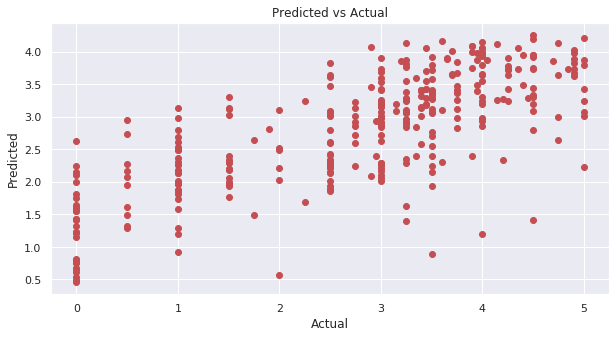

In [78]:
y_train_test_hat, y_train_test = predict_train(features_bert_clinical, y_true, get_optimal_rf_model(features_bert_clinical[:500], y_true[:500]))
plot_accuracy(y_train_test, y_train_test_hat)

### Next sentence prediction

In [0]:
def bert_based_features_nsp(data, local_bert_model, local_tokenizer):
  cls_vectors = np.zeros((len(data), 768*2))

  for i in range(len(data)):

    sen_1 = data[i][0] + " [SEP] " + data[i][1]
    sen_2 = data[i][1] + " [SEP] " + data[i][0]

    sen_1_input_ids = torch.tensor([local_tokenizer.encode(sen_1, add_special_tokens=True)])
    sen_1_vectors = local_bert_model(sen_1_input_ids)[0][0].detach().numpy()
    sen_1_cls_vector = sen_1_vectors[0]
    sen_1_cls_vector_reshaped = sen_1_cls_vector.reshape(1, -1)

    sen_2_input_ids = torch.tensor([local_tokenizer.encode(sen_2, add_special_tokens=True)])
    sen_2_vectors = local_bert_model(sen_2_input_ids)[0][0].detach().numpy()
    sen_2_cls_vector = sen_2_vectors[0]
    sen_2_cls_vector_reshaped = sen_2_cls_vector.reshape(1, -1)

    cls_vectors[i] = np.concatenate((sen_1_cls_vector, sen_2_cls_vector))
    if i == 0:
      print(len(sen_2_cls_vector))
      print(len(sen_2_vectors[1:-1]))
      print(len(sen_2))
      print(sen_2)
    if i % 50 == 0:
      print("i=",i)

  return cls_vectors

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

#### biobert

In [43]:
#BIO BERT FEATURES
features_bert_cls_bio_nsp = bert_based_features_nsp(X_train_original, bio_bert_model, bio_bert_tokenizer)

768
71
381
 Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time. [SEP]  Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


In [0]:
features_bert_cls_bio_nsp_scaled = StandardScaler().fit_transform(features_bert_cls_bio_nsp)
features_bert_cls_bio_nsp_principal_components = pca.fit_transform(features_bert_cls_bio_nsp_scaled)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.7096567125741803


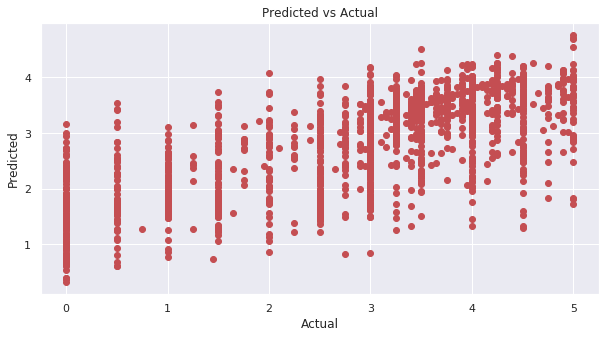

In [87]:
y_train_test_hat, y_train_test = predict_train(features_bert_cls_bio_nsp_principal_components, y_true, get_optimal_rf_model(features_bert_cls_bio_nsp_principal_components[1500:], y_true[1500:]))
plot_accuracy(y_train_test, y_train_test_hat)

#### STSb model

In [83]:
features_stsb_bert_cls_nsp = bert_based_features_nsp(X_train_original, stsb_bert_model, stsb_bert_tokenizer)

768
71
381
 Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time. [SEP]  Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


Optimal parameters: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.6577362024482314


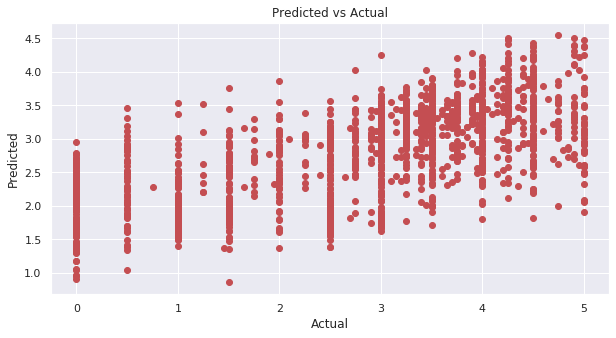

In [84]:
y_train_test_hat, y_train_test = predict_train(features_stsb_bert_cls_nsp, y_true, get_optimal_rf_model(features_stsb_bert_cls_nsp[1500:], y_true[1500:]))
plot_accuracy(y_train_test, y_train_test_hat)

In [0]:
features_stsb_bert_cls_nsp_scaled = StandardScaler().fit_transform(features_stsb_bert_cls_nsp)
features_stsb_bert_cls_nsp_principal_components = pca.fit_transform(features_stsb_bert_cls_nsp_scaled)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.5755774666385248


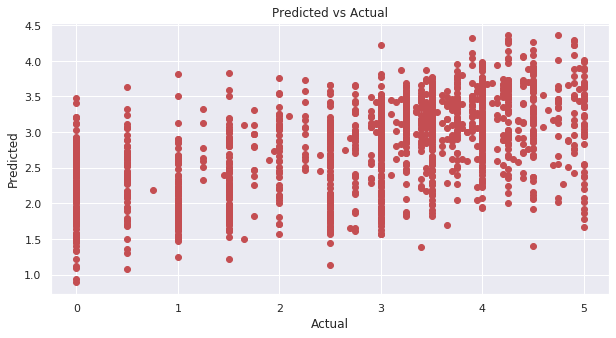

In [89]:
y_train_test_hat, y_train_test = predict_train(features_stsb_bert_cls_nsp_principal_components, y_true, get_optimal_rf_model(features_stsb_bert_cls_nsp_principal_components[1500:], y_true[1500:]))
plot_accuracy(y_train_test, y_train_test_hat)

#### clinical BERT

In [0]:
#Clinical bert model

In [73]:
features_clinicalbert_cls_nsp = bert_based_features_nsp(X_train_original, clinical_bert_model, clinical_bert_tokenizer)

768
71
381
 Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time. [SEP]  Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


In [0]:
features_clinicalbert_cls_nsp_scaled = StandardScaler().fit_transform(features_clinicalbert_cls_nsp)
features_clinicalbert_cls_nsp_principal_components = pca.fit_transform(features_clinicalbert_cls_nsp_scaled)

Optimal parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.7}
Accuracy: 0.6403145219543447


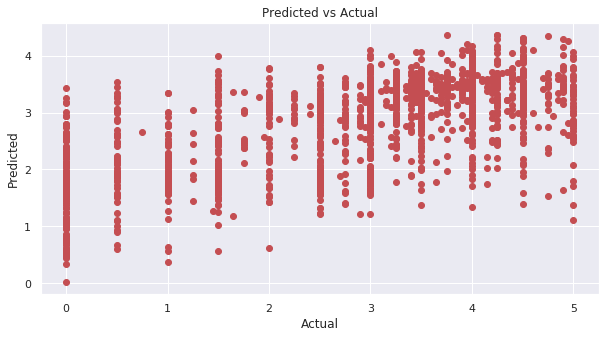

In [91]:
y_train_test_hat, y_train_test = predict_train(features_clinicalbert_cls_nsp_principal_components, y_true, get_optimal_rf_model(features_clinicalbert_cls_nsp_principal_components[1500:], y_true[1500:]))
plot_accuracy(y_train_test, y_train_test_hat)

#### finetuned BioBERT

In [98]:
#NSP finetuned BIO BERT FEATURES
features_biobert_cls_sts_biomedical_nsp = bert_based_features_nsp(X_train_original,  sts_biomedical_biobert_model, sts_biomedical_biobert_tokenizer)

768
71
381
 Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time. [SEP]  Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.
i= 0
i= 50
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400
i= 450
i= 500
i= 550
i= 600
i= 650
i= 700
i= 750
i= 800
i= 850
i= 900
i= 950
i= 1000
i= 1050
i= 1100
i= 1150
i= 1200
i= 1250
i= 1300
i= 1350
i= 1400
i= 1450
i= 1500
i= 1550
i= 1600
i= 1650


In [0]:
#PCA
features_biobert_cls_sts_biomedical_nsp_scaled = StandardScaler().fit_transform(features_biobert_cls_sts_biomedical_nsp)
features_biobert_cls_sts_biomedical_nsp_principal_components = pca.fit_transform(features_biobert_cls_sts_biomedical_nsp_scaled)

### combining one-sentence and NSP

In [0]:
features_biobert_onesentence_nsp = np.concatenate([features_biobert_sts_biomedical, features_biobert_cls_sts_biomedical_nsp_principal_components], axis = 1)

y_train_test_hat, y_train_test = predict_train(features_biobert_onesentence_nsp, y_true, get_optimal_rf_model(features_biobert_onesentence_nsp[1500:], y_true[1500:]))
plot_accuracy(y_train_test, y_train_test_hat)

## <center>4. Preliminary error analysis</center>

In [0]:
print(len(y_hat))

In [0]:
for i, y_elem in enumerate(y_true):
  if abs(y_elem - y_hat[i]) > 2:
    print(X_train_original[i], y_elem, y_hat[i])

## 5.caching features

### one sentence features

In [0]:
# CACHING ALL THE FEATURES

In [0]:
import pickle
def cache_features(name, features, cls):
  f = open('/content/drive/My Drive/'+name+'_features.pkl', 'wb')
  pickle.dump(features, f)
  f.close()
  f2 = open('/content/drive/My Drive/'+name+'_cls_features.pkl', 'wb')
  pickle.dump(cls, f2)
  f2.close()

In [0]:
cache_features('bert_vanilla', features_bert_og, features_bert_cls_og)
cache_features('biobert', features_bert_bio, features_bert_cls_bio)
cache_features('bert_nli_stsb', features_bert_stsb, features_bert_cls_stsb)
cache_features('bioclinicalbert', features_bert_bio_clinical, features_bert_cls_bio_clinical)
cache_features('clinicalbert', features_bert_clinical, features_bert_cls_clinical)

In [0]:
cache_features('roberta_stsbiomedical', features_roberta_sts_biomedical, features_roberta_cls_sts_biomedical)

In [0]:
cache_features('bert_stsbiomedical', features_bert_sts_biomedical, features_bert_cls_sts_biomedical)

In [0]:
cache_features('biobert_stsbiomedical', features_biobert_sts_biomedical, features_biobert_cls_sts_biomedical)

In [0]:
#TEST data features

#VANILLA
features_bert_og_test, features_bert_cls_og_test = bert_based_features_original(X_test_original, vanilla_bert_model, vanilla_bert_tokenizer)

In [0]:
# STS B finetuned
features_bert_sts_biomedical_test, features_bert_cls_sts_biomedical_test = bert_based_features_original(X_test_original, sts_biomedical_bert_model, sts_biomedical_bert_tokenizer)

In [0]:
# roberta finetuned
features_roberta_sts_biomedical_test, features_roberta_cls_sts_biomedical_test = bert_based_features_original(X_test_original, sts_biomedical_roberta_model, sts_biomedical_roberta_tokenizer)

In [0]:
# biobert finetuned (mean only)
features_biobert_sts_biomedical_test, features_biobert_cls_sts_biomedical_test = bert_based_features_original(X_test_original, sts_biomedical_biobert_model, sts_biomedical_biobert_tokenizer)

In [0]:
#BIO BERT FEATURES
features_bert_bio_test, features_bert_cls_bio_test = bert_based_features_original(X_test_original, bio_bert_model, bio_bert_tokenizer)

In [0]:
#STS B
features_bert_stsb_test, features_bert_cls_stsb_test = bert_based_features_original(X_test_original, stsb_bert_model, stsb_bert_tokenizer)

In [0]:
#BIO CLINICAL BERT FEATURES
features_bert_bio_clinical_test, features_bert_cls_bio_clinical_test = bert_based_features_original(X_test_original, bio_clinical_bert_model, bio_clinical_bert_tokenizer)

In [0]:
#CLINICAL BERT FEATURES
features_bert_clinical_test, features_bert_cls_clinical_test = bert_based_features_original(X_test_original, clinical_bert_model, clinical_bert_tokenizer)

In [0]:
cache_features('bert_vanilla_test', features_bert_og_test, features_bert_cls_og_test)
cache_features('biobert_test', features_bert_bio_test, features_bert_cls_bio_test)
cache_features('bert_nli_stsb_test', features_bert_stsb_test, features_bert_cls_stsb_test)
cache_features('bioclinicalbert_test', features_bert_bio_clinical_test, features_bert_cls_bio_clinical_test)
cache_features('clinicalbert_test', features_bert_clinical_test, features_bert_cls_clinical_test)

In [0]:
cache_features('roberta_stsbiomedical_test', features_roberta_sts_biomedical_test, features_roberta_cls_sts_biomedical_test)
cache_features('bert_stsbiomedical_test', features_bert_sts_biomedical_test, features_bert_cls_sts_biomedical_test)
cache_features('biobert_stsbiomedical_test', features_biobert_sts_biomedical_test, features_biobert_cls_sts_biomedical_test)

### NSP features

In [0]:
import pickle
def cache_nsp_features(name, features):
  f = open('/content/drive/My Drive/'+name+'_NSP_features.pkl', 'wb')
  pickle.dump(features, f)
  f.close()

In [0]:
cache_nsp_features('biobert', features_bert_cls_bio_nsp_principal_components)
cache_nsp_features('bert_nli_stsb', features_stsb_bert_cls_nsp_principal_components)
cache_nsp_features('clinicalbert', features_clinicalbert_cls_nsp_principal_components)
cache_nsp_features('biobert_stsbiomedical', features_biobert_cls_sts_biomedical_nsp_principal_components)

In [108]:
#BIO BERT FEATURES
features_bert_cls_bio_nsp_test = bert_based_features_nsp(X_test_original, bio_bert_model, bio_bert_tokenizer)

768
24
125
male who presents for evaluation of Med Management. [SEP] Requested to see patient for evaluation of: pressure ulcer consult.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400


In [109]:
# STSb model
features_stsb_bert_cls_nsp_test = bert_based_features_nsp(X_test_original, stsb_bert_model, stsb_bert_tokenizer)

768
23
125
male who presents for evaluation of Med Management. [SEP] Requested to see patient for evaluation of: pressure ulcer consult.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400


In [110]:
# clincal BERT
features_clinicalbert_cls_nsp_test = bert_based_features_nsp(X_test_original, clinical_bert_model, clinical_bert_tokenizer)

768
24
125
male who presents for evaluation of Med Management. [SEP] Requested to see patient for evaluation of: pressure ulcer consult.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400


In [111]:
#finetuned BIO BERT FEATURES
features_biobert_cls_sts_biomedical_nsp_test = bert_based_features_nsp(X_test_original,  sts_biomedical_biobert_model, sts_biomedical_biobert_tokenizer)

768
23
125
male who presents for evaluation of Med Management. [SEP] Requested to see patient for evaluation of: pressure ulcer consult.
i= 0
i= 50
i= 100
i= 150
i= 200
i= 250
i= 300
i= 350
i= 400


In [0]:
#PCA

features_bert_cls_bio_nsp_test_scaled = StandardScaler().fit_transform(features_bert_cls_bio_nsp_test)
features_bert_cls_bio_nsp_test_principal_components = pca.fit_transform(features_bert_cls_bio_nsp_test_scaled)

features_stsb_bert_cls_nsp_test_scaled = StandardScaler().fit_transform(features_stsb_bert_cls_nsp_test)
features_stsb_bert_cls_nsp_test_principal_components = pca.fit_transform(features_stsb_bert_cls_nsp_test_scaled)

features_clinicalbert_cls_nsp_test_scaled = StandardScaler().fit_transform(features_clinicalbert_cls_nsp_test)
features_clinicalbert_cls_nsp_test_principal_components = pca.fit_transform(features_clinicalbert_cls_nsp_test_scaled)

features_biobert_cls_sts_biomedical_nsp_test_scaled = StandardScaler().fit_transform(features_biobert_cls_sts_biomedical_nsp_test)
features_biobert_cls_sts_biomedical_nsp_test_principal_components = pca.fit_transform(features_biobert_cls_sts_biomedical_nsp_test_scaled)

In [0]:
cache_nsp_features('biobert_test', features_bert_cls_bio_nsp_test_principal_components)
cache_nsp_features('bert_nli_stsb_test', features_stsb_bert_cls_nsp_test_principal_components)
cache_nsp_features('clinicalbert_test', features_clinicalbert_cls_nsp_test_principal_components)
cache_nsp_features('biobert_stsbiomedical_test', features_biobert_cls_sts_biomedical_nsp_test_principal_components)